### maximum margin classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


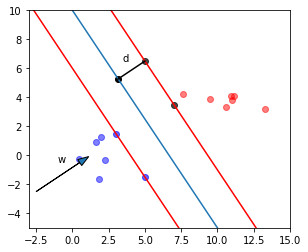

In [ ]:
# seperating line
b = 10
w1 = -1.5
w2 = -1
# as vector and the normal to the separating line
w = np.array([w1, w2])
w_norm = w/np.sqrt(np.dot(w, w))
this_is_the_lenth = np.dot(w_norm, w_norm)
# class 1
cl1 = np.array([np.random.normal(loc=1.5, scale=1.1, size=5), 
          np.random.normal(loc=0, scale = 1.2, size = 5)]).T
# support vectors class 1:
cl1_s = np.array([np.array([5, 7]), (b+4) + w1 * np.array([5, 7])]).T


# class 2
cl2 = np.array([np.random.normal(loc=11, scale=2., size=7),
                np.random.normal(loc=4, scale=0.6, size=7)]).T 
# support vectors class 2:
cl2_s = np.array([np.array([3, 5]), (b-4) + w1 * np.array([3, 5])]).T

fig = plt.figure() 
ax = plt.axes()
plt.xlim(-3, 15)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
x = np.linspace(-5, 15, 100)
y = b + w1 * x
ax.plot(x, b + w1 * x)
ax.plot(x, (b-4) + w1 * x, color='red')
ax.plot(x, (b+4) + w1 * x, color='red')
ax.scatter(cl1[:, 0], cl1[:, 1], color='blue', alpha=0.5)
ax.scatter(cl2[:, 0], cl2[:, 1], color='red', alpha=0.5)
ax.scatter(cl1_s[:, 0], cl1_s[:, 1], color='black', alpha=0.7)
ax.scatter(cl2_s[:, 0], cl2_s[:, 1], color='blue', alpha=0.6)
#ax.scatter(7, b + w[0] * 7, color='black')
ax.scatter(41/13, b + w1 *(41/13), color = 'black')
ax.plot([41/13, cl1_s[0,0]],[b + w1 * (41/13), cl1_s[0,1]], color='black')
plt.annotate(text='d',xy=(45/13, 6.5))

plt.arrow(-2.5, -2.5, w[0] * -2, w[1] * -2, head_width=0.5)
plt.annotate(text='w', xy=(-1,-0.5))
# plt.scatter(x, y, color='red', alpha = 0.45)
print(f'{b + w1 * x + w2 * y}')

Im 2-dimensionalen Raum haben wir die Variablen x, y. Alle Punkte auf einer Geraden (separating plane) bekommt man: $$ a + b\cdot x = c\cdot y$$. Trivialerweise ist $$c=1$$ meist gültig. Umgekehrt kann man die Gerade auch als die Menge aller Punkte definieren, die folgender Bedingung genügen:<br>
$$ a + b\cdot x + c\cdot y = 0$$; im trivialen Fall wäre $$c=-1$$

Für alle Punkte unterhalb der Gerade gilt
$$ a + b\cdot x + c\cdot y < 0$$
und für alle Punkte oberhalb der Geraden gilt
$$ a + b\cdot x + c\cdot y > 0$$

Für die Klassification gilt, dass die Klassen immer mit $-1$ und $1$ benannt werden. Ein neuer Punkt $(x, y)$ wird klassifiziert:
$$\hat{\text{pred}} = \text{sign}(a + b\cdot x + c\cdot y)$$

### Aenderung der Schreibweise:
Weil wir kein Regressionsproblem haben, sondern ein Klassifikationsproblem, benennen wir im obigen Beispiel die Koeffizienten und die Variablen um:
$$\hat{\text{pred}} = \text{sign}(b + \omega_1\cdot x_i + \omega_2\cdot x_2)$$
und in Vektorschreibweise:
$$\hat{\text{pred}} = \text{sign}(b + \mathbf{\omega}\mathbf{x})$$

Es kann gezeigt werden, dass der Vektor $\mathbf{\omega}$ senkrecht auf die Trennungs-Ebene (in der Graphik oben die mittlere Gerade) steht. Dies habe ich als Pfeil eingezeichnet.

Nun soll eine Ebene gefunden werden, deren margin maximal ist; als margin wird der Abstand zu den nähesten data-Punkten. Die Datenpunkte, die auf den margins zu liegen kommen heissen support vectors. Die Enfernung dieser Punkte von der Trennlinie kann anegeben werden:
$$ d= y_i(\mathbf{\omega}\mathbf{x}_i + b)/|\mathbf{\omega}|$$
$y_i$ ändert das Vorzeichen, so dass die Distanz immer positiv ist, $|\mathbf{\omega}|$ ist die Länge des Vektors $\mathbf{\omega}$. Sie dient zur normierung. Weil alle Punkte auf dem margin dieselbe Distanz zur Trennlinie haben und weil der margin symmetrisch ist muss
$$p=2/|\mathbf{\omega}|$$ maximiert werden, um den margin möglichst gross zu machen. Damit haben wir die formulierung unseres minimal-margin classifiers:<br>
Finde $\mathbf{\omega}$ und $b$ so, dass:
* $\frac{1}{2}\omega^{T}\omega$ minimiert wird, für alle
* $(\mathbf{x}_i, y_i), y_i(\mathbf{\omega}\mathbf{x}_i + b) \geq 1$

Will man das lösen, ergibt sich ein quadratische Optimierungsproblem, welches mit Lagrange Multiplikatoren gelöst werden kann.

Die characteristische Gleichung ergibt sich zu:
* $\text{max}_{\alpha}\sum_i\alpha_i - \frac{1}{2}\alpha_i\alpha_j y_i y_j, \mathbf{x}_i^{T} \cdot \mathbf{x}_j$
* mit: $\sum_i\alpha_i y_i = 0$

Für das Verständnis der nachfolgenden Erklärungen zu kernels, ist der Ausdruck $\mathbf{x}_i^{T} \cdot \mathbf{x}_j$ entscheidend. Hierbei wird das Skalarprodukt eines jeden Daten-Punktes mit jedem anderen Daten-Punkt berechnet. Für normierte Vektoren $\mathbf{x}_i$ ist das Skalarprodukt ein Ähnlichkeitsmass (cosine-similarity, correlation-coefficient).


In [ ]:
cl1_x = np.random.normal(loc=6, scale=0.5, size=5)
cl1_y = np.random.normal(loc=11, scale = 0.5, size = 5)

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x, y = make_circles(n_samples = (70, 30), random_state=42, factor=0.8)

Text(0, 0.5, '2nd dimension')

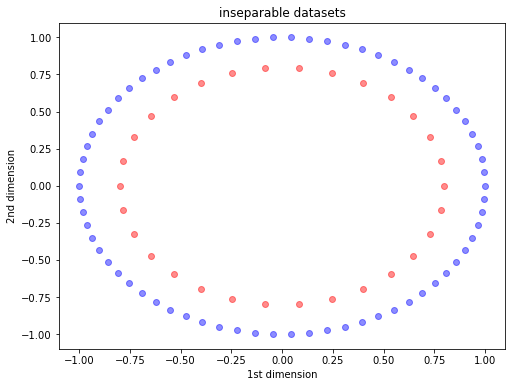

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x[y==1, 0], x[y==1, 1], color='red', alpha = 0.45)
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue', alpha = 0.45)
plt.title('inseparable datasets')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x3 = np.sqrt(2) * x[:, 0] * x[:, 1]
x3 = x3.reshape((-1, 1))
mapped_x = np.concatenate((x ** 2, x3), axis=1)
mapped_x.shape

(100, 3)

Text(0.5, 0, '3rd dimension')

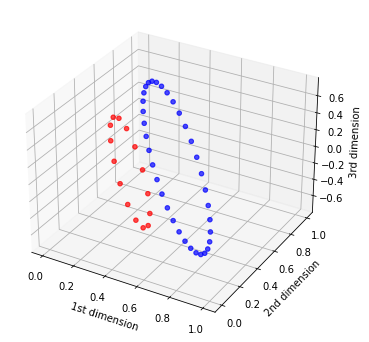

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mapped_x[y==1, 0], mapped_x[y==1, 1], mapped_x[y==1, 2], color='red', alpha = 0.45)
ax.scatter(mapped_x[y==0, 0], mapped_x[y==0, 1], mapped_x[y==0, 2], color='blue', alpha = 0.45)
#plt.title('inseparable datasets')
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.set_zlabel('3rd dimension')

In [ ]:
# not 100 % correct though
# https://stats.stackexchange.com/questions/63881/use-gaussian-rbf-kernel-for-mapping-of-2d-data-to-3d

from scipy.spatial.distance import pdist, squareform
from scipy import exp
pairwise_d = squareform(pdist(x, 'euclidean'))
K = exp(-pairwise_d **2 / (2 ** 2))
new_dim = np.sum(K, axis=1)

/home/martin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  import sys


Text(0.5, 0, '3rd dimension')

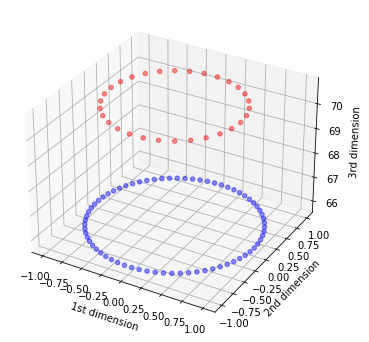

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y==1, 0], x[y==1, 1], new_dim[y==1], color='red', alpha = 0.45)
ax.scatter(x[y==0, 0], x[y==0, 1], new_dim[y==0], color='blue', alpha = 0.45)
#plt.title('inseparable datasets')
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.set_zlabel('3rd dimension')

Wir erinnern die charakteristische Formel des maximal-margin classifiers:
* $\text{max}_{\alpha}\sum_i\alpha_i - \frac{1}{2}\alpha_i\alpha_j y_i y_j, \mathbf{x}_i^{T} \cdot \mathbf{x}_j$
* mit: $\sum_i\alpha_i y_i = 0$

Anstatt mit den urspr. Daten-Punkten $\mathbf{x}_i$ und $\mathbf{x}_j$ muss diese Gleichung jetzt für die Projektionen der Daten vorgenommen werden:


### unsere erste Projektion:

$\Phi(\mathbf{x})\rightarrow \mathbf{x}_1^{2}, \mathbf{x}_2^{2},\sqrt{2}\mathbf{x}_1\mathbf{x}_2$

einsetzen in die characteristische Gleichung für 2 Daten-Punkte $\mathbf{x}_i$ und $\mathbf{x}_j$:
$$
\langle\Phi(\mathbf{x}_i),\Phi(\mathbf{x}_j)\rangle = $$
$$\langle[x_{i1}^{2},x_{i2}^{2}, \sqrt{2}x_{i1}x_{i2}],[x_{j1}^{2},x_{j2}^{2}, \sqrt{2}x_{j1}x_{j2}]\rangle =
$$
$$
x_{i1}^{2}x_{j1}^{2} + x_{i2}^{2}x_{j2}^{2} +2 x_{i1}x_{i2}x_{j1}x_{j2}
$$

Trick: Es gibt eine einfachere Rechenvorschrift, die zum selben Ergebnis kommt. Das ist der Kernel-Trick

$$\langle\Phi(\mathbf{x}_i),\Phi(\mathbf{x}_j)\rangle = \langle\mathbf{x}_i,\mathbf{x}_j\rangle^{2} =$$
$$\langle[x_{i1}, x_{i2}],[x_{j1}, x_{j2}]\rangle^{2} = $$
$$(x_{i1}x_{j1} + x_{i2}x_{j2})^{2} = $$
$$x_{i1}^{2}x_{j1}^{2} + x_{i2}^{2}x_{j2}^{2} + 2 x_{i1}x_{i2}x_{j1}x_{j2}$$

Unterschied:<br>
1.Methode:
* Projektion in höher-dimensionalen Raum
* Multiplikation in höher-dimensionalen Raum

2.Method:
* Multiplikation im ausgangs-Raum
* Quadratur des Ergebnisses

Basically, kernels are similarity measures outside the usual Euclidean space.

In [1]:
import requests

In [40]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
r = requests.get(url, allow_redirects=True)
open('adult.data', 'wb').write(r.content)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
r = requests.get(url, allow_redirects=True)
open('adult.test', 'wb').write(r.content)


2003153

In [41]:
import pandas as pd
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

train = pd.read_csv('adult.data', sep=",\s", header=None, names = column_names, engine = 'python')
test = pd.read_csv('adult.test', sep=",\s", header=None, names = column_names, engine = 'python')

# test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

In [42]:
display(train.income.unique(), test.income.unique())

array(['<=50K', '>50K'], dtype=object)

array([None, '<=50K.', '>50K.'], dtype=object)

In [43]:
test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [44]:
test.drop(axis=0, index=0, inplace=True)

In [45]:
test.income = [int(i == '>50K.') for i in test.income]
train.income = [int(i == '>50K') for i in train.income]
test_label = test.income
test =test.drop('income', axis=1)
train_label = train.income
train = train.drop('income', axis=1)

In [46]:
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [47]:
display(sum(train_label), sum(test_label))

7841

3846

In [48]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

integer_columns = ['age','fnlwgt','educational-num','capital-gain', 'capital-loss', 'hours-per-week']
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('one_hot', OneHotEncoder(handle_unknown='ignore'))])
    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, integer_columns),
        ('cat', categorical_transformer, categorical_columns)])


In [49]:
from sklearn import svm
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3))])

clf.fit(train, train_label)
print("model score: %.3f" % clf.score(test, test_label))

model score: 0.860


In [50]:
from sklearn import svm
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC(kernel = 'linear'))])

clf.fit(train, train_label)
print("model score: %.3f" % clf.score(test, test_label))

model score: 0.853


In [51]:
from sklearn import svm
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC(kernel = 'poly'))])

clf.fit(train, train_label)
print("model score: %.3f" % clf.score(test, test_label))

model score: 0.857


In [52]:
from sklearn import svm
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm.SVC(kernel = 'sigmoid'))])

clf.fit(train, train_label)
print("model score: %.3f" % clf.score(test, test_label))

model score: 0.780


In [ ]:
https://archive.ics.uci.edu/ml/datasets/adult
https://github.com/saravrajavelu/Adult-Income-Analysis/blob/master/Adult_Income_Analysis.py

## One-Class SVM
Finde die kleinst mögliche Kugel (hyper sphere), die alle Datenpunkte umschliesst.
Angewendet auf neue Datenpunkte:
    - finde die Distanz zum Mittelpunkt: ist diese Grösser als der Radius der hyper sphere, dann ist der Datenpunkt nicht in der Klasse
    - finde die Distanz zur Begrenuzungsebene: pos Distanz -> in-class; neg Distanz -> out-class